<img align=left src='keras.png' width = '400'/>

**Keras** jest to wysokopoziomowe API, napisane w Pythonie które umożliwia nam programowanie biblotek TensorFlow (Google), CNTK (Microsoft), czy Theano (Montreal University). Dodatkowo kod Keras który napisaliśmy raz mozemy wykorzystać z każdą z tych bibliotek.

# Keras - sieć do rozpoznawania cyfr

Baza MNIST zawiera cyfry napisanych ręcznie przez urzedników American Census Bureau i studentów.  

60 tysięcy w zestawie treningowym  
10 tysięcy w zestawie testowym 

Obrazki są przeskalowane do 28x28 pikseli i zapisane jaki plik cvs. Mała próbka poniżej.  

<img align=left src='MnistExamples.png'/>

## Sieć Neuronowa w Keras
Importujemy niezbędne moduły

In [1]:
import numpy as np

# import biblioteki do wizualizacji
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,20) #powiekszamy wyświetlane obrazki

from keras.datasets import mnist # importujemy bazę cyfr MNIST
from keras.models import Sequential # importujemy model 
from keras.layers import Dense, Dropout, Activation

from keras.utils import to_categorical 
from keras.preprocessing import image as kerasimg

Using TensorFlow backend.


### Ładujemy dane - MNIST

In [2]:
classes = 10 # ilość klas do rozpoznania (iność rozpoznawanych cyfr)

# ladujemy dane i przypoisujemy zmiennne do zestawu treningowego i testowego
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train struktura danych", X_train.shape)
print("y_train struktura danych", y_train.shape)

X_train struktura danych (60000, 28, 28)
y_train struktura danych (60000,)


In [4]:
a = 7

X_train[a]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
y_train[a]

3

Text(0.5,1,'Class 3')

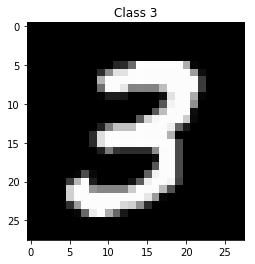

In [6]:
plt.imshow(X_train[a], cmap='gray', interpolation='none')
plt.title("Class {}".format(y_train[a]))

## Formatujemy dane treningowe

Nasza sieć potrzrebuje danych wejsciowy w formie ciągu liczb (jednowymiarowego wektora) dla każdego przykładu .
Musimy przekształcić obrazki (tablice) 28X28 w ciąg 784 liczb.
Musimy również przeskalować dane wejściowe do zakresu **[0-1]** z zakresu [0-255]

In [7]:
X_train = X_train.reshape(60000, 784)   # zmieniamy kształt danych treningowych 28X28 do 784
X_test = X_test.reshape(10000, 784)     # zmieniamy kształt danych testowych 28X28 do 784
X_train = X_train.astype('float32')     # zmieniamy typ danych na zmiennoprzecinkowe
X_test = X_test.astype('float32')       # zmieniamy typ danych na zmiennoprzecinkowe
X_train /= 255                          # przeskalowujemy dane do zakresu [0-1]
X_test /= 255                           # przeskalowujemy dane do zakresu [0-1]
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


### Zmieniamy odpowiedzi do: one-hot format

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [8]:
y_train[a]

3

In [9]:
Y_train = to_categorical(y_train, classes)
Y_test = to_categorical(y_test, classes)

In [10]:
Y_train[a]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

# Schemat naszej sieci
3 input + 2 warstwy + odpowiedz sieci, fully connected
<img src="tf_network.png" />

In [11]:
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('relu')) # Funkcja aktywacyjna, w tym wypadku reLU
                           
model.add(Dropout(0.2))   # Dropout oznacza, ze w kolejnych epokach odrzycamy część neuronów z treningu

model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax')) # Dziękifunkcji  "softmax" odpowiedzi są w zakresie [0-1] i sumują się do 1
                                   # czyli mogą być traktowane jako prawdopodobieństwo

## Kompilujemy nasz model
Nasz model zbudowany w Pythonie jest  optymalizowany i kompilowany do kodu maszynowego. 

Do skompilowania naszego modelu Keras potrzebuje również **loss function** i **optimizera**. 
Nasz **loss function** to *categorical crossentropy*, która dobrze nadaje sie do porównywania dwóch rozkładów prawdopodobieństwa.

Odpowiedż naszej sieci to prawdopodobieństwo, ze dana cyfra to któraś z 10 cyfr (np. "na 80% ten obrazek to cyfra '3', na 10% to '8', na 5% to '2', itd"), a targetem jest dystrybucja w której prawidlłowa odpowiedż ma 100% prawdopodobieństwa, a wszystkie inne odpowiedzi 0%.Cross-entropy jest miarą różnicy pomiędzy naszą dystrybucją prawdopodobieństwa, a prawidłową  
[Szczegóły na Wikipedii](https://en.wikipedia.org/wiki/Cross_entropy)

Optimizer decyduje, jak szybko model się uczy i zapobiega jego zatrzymaniu.  
"adam" (Adaptive Moment Estimation) jest dobrym wyborem.

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Trenujemy naszą sieć!

In [13]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.4999 - acc: 0.8497 - val_loss: 0.1886 - val_acc: 0.9435
Epoch 2/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2311 - acc: 0.9319 - val_loss: 0.1334 - val_acc: 0.9612
Epoch 3/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.1787 - acc: 0.9474 - val_loss: 0.1096 - val_acc: 0.9668
Epoch 4/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.1487 - acc: 0.9558 - val_loss: 0.1044 - val_acc: 0.9684
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1296 - acc: 0.9613 - val_loss: 0.0909 - val_acc: 0.9720
Epoch 6/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.1163 - acc: 0.9654 - val_loss: 0.0862 - val_acc: 0.9729
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1042 - acc: 0.9683 - val_loss: 0.0770 - val_acc

## Sprawdzamy czy sieć się czegoś nauczyła

Poniżej przykłady prawidłowych i nieprawidłowych odpowiedzi

In [14]:
#dobrze jest zapisac model
model.save('model_MNIST.h5')

In [15]:
# funkcja predict_classeszwraca najbardziej prawdopodobna klase  
# zgodnie z wytrenowanym modelem
predicted_classes = model.predict_classes(X_test)

# sprawdzamy które cyfre odczytalismy prawidlowo
correct = np.nonzero(predicted_classes == y_test)[0]
incorrect = np.nonzero(predicted_classes != y_test)[0]

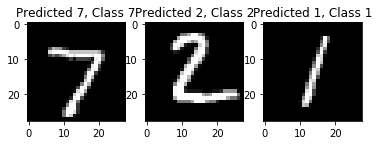

In [16]:
plt.figure()
for i, correct in enumerate(correct[:3]):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

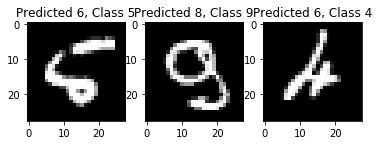

In [17]:
plt.figure()
for i, incorrect in enumerate(incorrect[:3]):
    plt.subplot(1,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

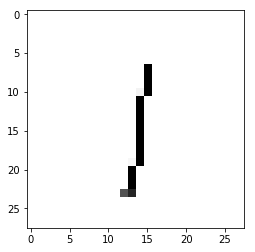

In [18]:
from keras.preprocessing import image

def prepare_img(picture_path):
    img = image.load_img(path=picture_path,grayscale=True,target_size=(28,28))
    img = 255 - image.img_to_array(img) #  invert the colors
    test_img = img.reshape((1, 784)) # reshape from 28x28 to list of 784 values
    return test_img

image_file ='C:/Users/ajankows/Desktop/python/obrazki_dane/1.png'

obrazek = prepare_img(image_file)

plt.imshow(obrazek.reshape(28,28), cmap='Greys', interpolation='None')

In [76]:
obrazek.shape

(1, 784)

In [21]:
odp_class = model.predict_classes(obrazek)
odp_probability = model.predict(obrazek)

print(f'odpowiedz sieci: {odp_class}')

odpowiedz sieci: [1]


In [22]:
for i in range(10):
    ob = "C:/Users/ajankows/Desktop/python/obrazki_dane/"+str(i)+".png"
    obrazek = prepare_img(ob)
    print(ob, model.predict_classes(obrazek))

C:/Users/ajankows/Desktop/python/obrazki_dane/0.png [0]
C:/Users/ajankows/Desktop/python/obrazki_dane/1.png [1]
C:/Users/ajankows/Desktop/python/obrazki_dane/2.png [2]
C:/Users/ajankows/Desktop/python/obrazki_dane/3.png [3]
C:/Users/ajankows/Desktop/python/obrazki_dane/4.png [4]
C:/Users/ajankows/Desktop/python/obrazki_dane/5.png [5]
C:/Users/ajankows/Desktop/python/obrazki_dane/6.png [4]
C:/Users/ajankows/Desktop/python/obrazki_dane/7.png [3]
C:/Users/ajankows/Desktop/python/obrazki_dane/8.png [8]
C:/Users/ajankows/Desktop/python/obrazki_dane/9.png [9]
